# 3.6 Applied Problems: 8, 9, and 15

## Question 8

This question involves the use of simple linear regression on the Auto data set.

#### a)
Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output.

In [435]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [436]:
Auto = load_data("Auto") 
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [437]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]), 'horsepower': Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [438]:
y = Auto['mpg']
model = sm.OLS(y, X) 
results = model.fit()

In [439]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [440]:
design = MS(['horsepower'])
X = design.fit_transform(Auto) 
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [441]:
new_df = pd.DataFrame({'horsepower':[98]}) 
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [442]:
# Mean of 98 horsepower
new_predictions = results.get_prediction(newX); 
new_predictions.predicted_mean

array([24.46707715])

In [443]:
# Confidence interval for 98 horsepower
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [444]:
# Prediction interval for 98 horsepower
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

#### <font color='blue'>i).</font> Is there a relationship between the predictor and the response?
Due to very low p-values and high t-values, there seems to be a very strong relationship between them.

#### <font color='blue'>ii).</font> How strong is the relationship between the predictor and the response?
Extremely strong, with a t-value of over 5 there is a very strong relationship.

#### <font color='blue'>iii).</font> Is the relationship between the predictor and the response positive or negative?
Negative, because the coefficient is negative.

#### <font color='blue'>iv).</font> What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
Predicted mpg for 98 horsepower is '24.46707715'. The associated confidence and prediction intervals are (respectively) [23.97307896, 24.96107534] and [14.80939607, 34.12475823]

#### b).
Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

In [445]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b] 
    ax.plot(xlim, ylim, *args, **kwargs)

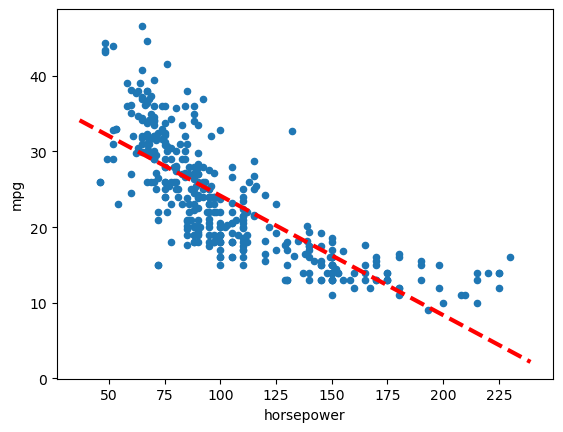

In [446]:
ax = Auto.plot.scatter('horsepower', 'mpg') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

#### c)
Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

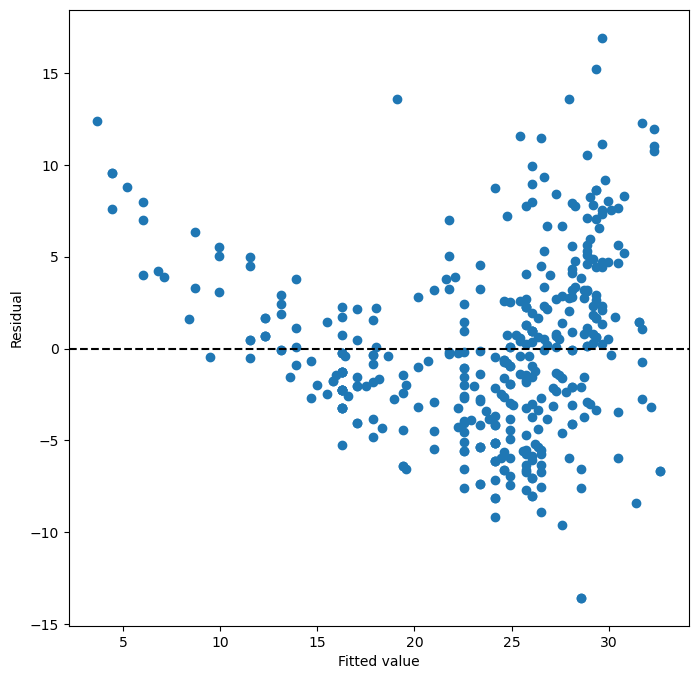

In [447]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid) 
ax.set_xlabel('Fitted value') 
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

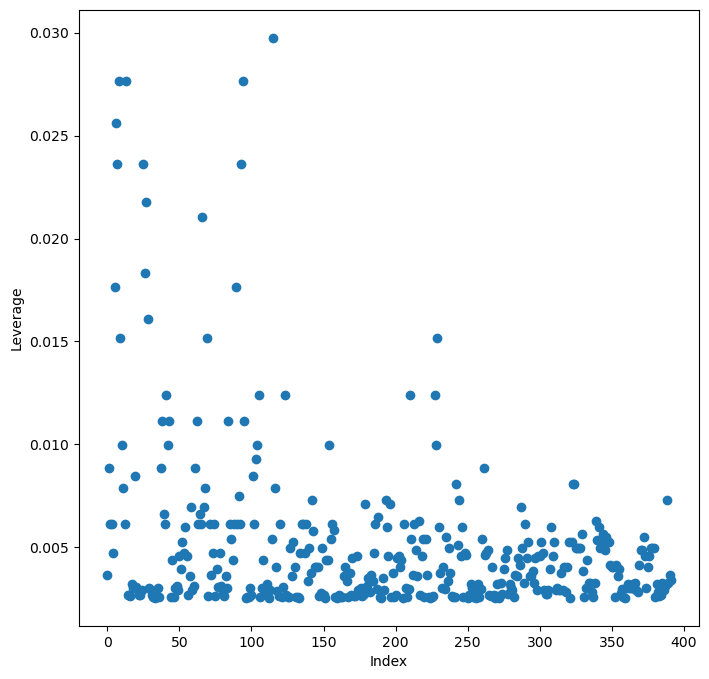

In [448]:
infl = results.get_influence() 
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) 
ax.set_xlabel('Index')
ax.set_ylabel('Leverage') 
np.argmax(infl.hat_matrix_diag)

<strong>Discovered problems:</strong> There are some problems associated with the above diagnostic plots. One problem includes heteroscedasticity, which can be seen as the level of variance does not stay equal throughout the Fitted Values vs Residual plot, and we can see it increases. This can mean that the dataset is not completely linear as the residuals are not close to equal throughout the fitted plot.

## Question 9

This question involves the use of multiple linear regression on the Auto data set.

#### a)
Produce a scatterplot matrix which includes all of the variables in the data set.

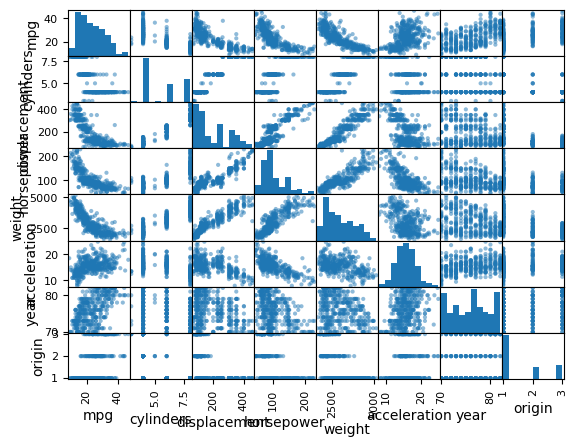

In [449]:
pd.plotting.scatter_matrix(Auto);

#### b)
Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [450]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### c)
Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

#### <font color='blue'>i).</font> Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
What am I using as the second table for anova???

#### <font color='blue'>ii).</font> Which predictors appear to have a statistically significant relationship to the response?
Judging from the p-values, the ones that are statistically significant seem to be: displacement, weight, year, and origin.

#### <font color='blue'>iii).</font> What does the coefficient for the year variable suggest?
The coefficient tells us that there is a positive relationship between mpg and years. This means that as the year of the car increases (newer cars), the average mpg increases as well.  

In [451]:
terms = Auto.columns.drop(['mpg', 'name']) 
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [452]:
X = MS(terms).fit_transform(Auto) 
model = sm.OLS(y, X)
results1 = model.fit() 
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [453]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.04e-139
Time:                        12:23:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### d)
Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

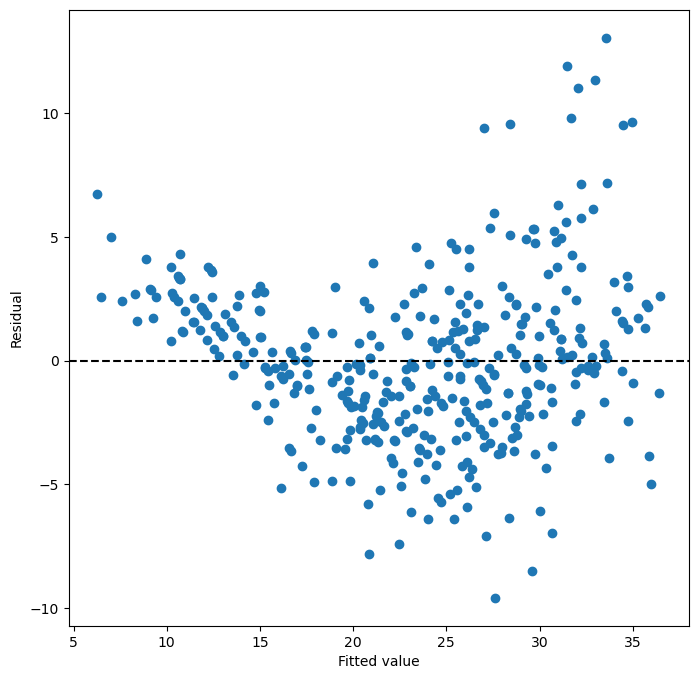

In [454]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues , results1.resid) 
ax.set_xlabel('Fitted value') 
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

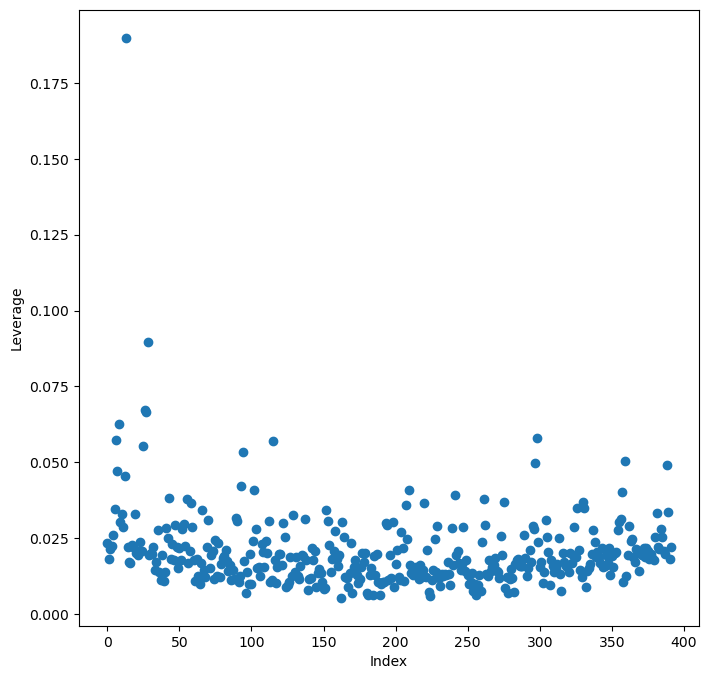

In [455]:
infl1 = results1.get_influence() 
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl1.hat_matrix_diag) 
ax.set_xlabel('Index')
ax.set_ylabel('Leverage') 
np.argmax(infl1.hat_matrix_diag)

<strong>Discovered problems:</strong> There are some points that have a large amount of leverage in the linear regression, as seen by the leverage plot with the large outlier. There is also still the problem of heteroscedasticity, although it is less apparent in the leverage plot with the large outliers. 

#### e)
Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

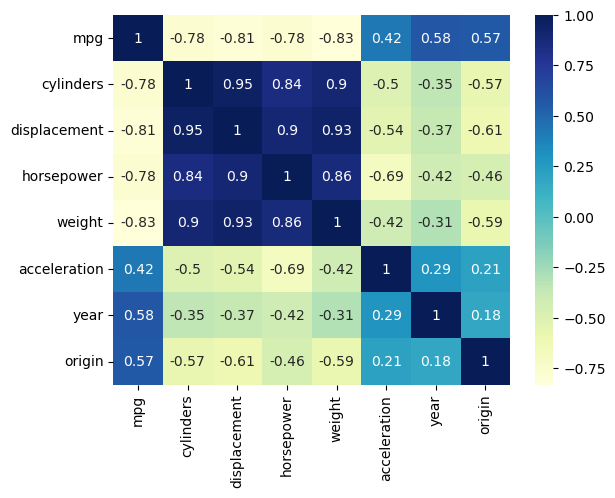

In [456]:
import seaborn as sns
corr_matrix = Auto.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu");

<strong><u>Note:</u></strong> This correlation heatmap is very helpful, but it should be noted that although it is a good basis, strong correlation does not equate to statistical significance. Especially in large datasets, even interactions with weak correlation can be statistically significant. 

<strong>source:</strong> https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression5.html#:~:text=The%20key%20thing%20to%20remember,correlations%20can%20become%20statistically%20significant.

In [457]:
X = MS(['cylinders', 'displacement',('cylinders', 'displacement')]).fit_transform(Auto) 
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,48.2204,2.347,20.545,0.0
cylinders,-2.4184,0.535,-4.524,0.0
displacement,-0.1344,0.016,-8.321,0.0
cylinders:displacement,0.0118,0.002,5.711,0.0


In [458]:
X = MS(['weight', 'displacement',('weight', 'displacement')]).fit_transform(Auto) 
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,53.724400,1.940000,27.697,0.0
weight,-0.008900,0.001000,-10.539,0.0
displacement,-0.078300,0.011000,-6.922,0.0
weight:displacement,0.000017,0.000003,6.253,0.0


In [459]:
X = MS(['cylinders', 'acceleration',('cylinders', 'acceleration')]).fit_transform(Auto) 
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,31.3719,5.276,5.946,0.000
cylinders,-1.8469,0.856,-2.159,0.032
acceleration,0.7350,0.337,2.179,0.030
cylinders:acceleration,-0.1118,0.058,-1.926,0.055


<strong><u>Conclusions:</u></strong> It seems like weight and displacement have a decently high interaction given their low p-value of basically 0; same with cylinders and displacement, but the interaction between cylinders and acceleration does not seem to be statistically significant.

#### f).
Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [460]:
X = MS([poly('horsepower', degree=2), 'mpg']).fit_transform(Auto) 
model3 = sm.OLS(y, X**2)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,12.5198,0.116,107.718,0.0
"poly(horsepower, degree=2)[0]",-281.8415,22.866,-12.326,0.0
"poly(horsepower, degree=2)[1]",83.0243,14.249,5.827,0.0
mpg,0.0187,0.000,131.055,0.0


## Question 15

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### a).
For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [461]:
boston = load_data("Boston") 
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [462]:
# ignore this
terms = boston.columns.drop('crim') 
X = MS(terms).fit_transform(boston) 
y = boston['crim'] #response
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


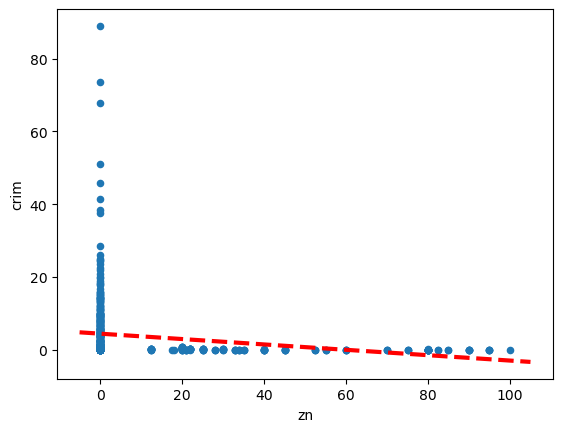

In [463]:
X1 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'zn': boston['zn']})
y1 = boston['crim']
model = sm.OLS(y1, X1) 
results = model.fit()
ax = boston.plot.scatter('zn', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [464]:
model = sm.OLS(y1, X1) 
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


There is a statistically significant relationship between zn and crime due to the low p-value of < 0.05. 

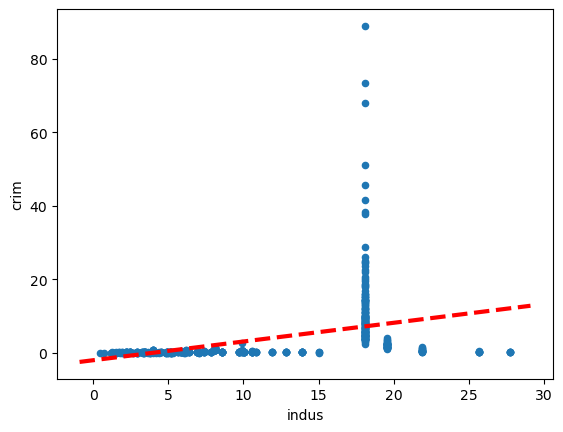

In [465]:
X2 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'indus': boston['indus']})
y2 = boston['crim']
model = sm.OLS(y2, X2) 
results = model.fit()
ax = boston.plot.scatter('indus', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [466]:
model = sm.OLS(y2, X2) 
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


There is a statistically significant relationship between indus and crime due to a low p-value of < 0.05. 

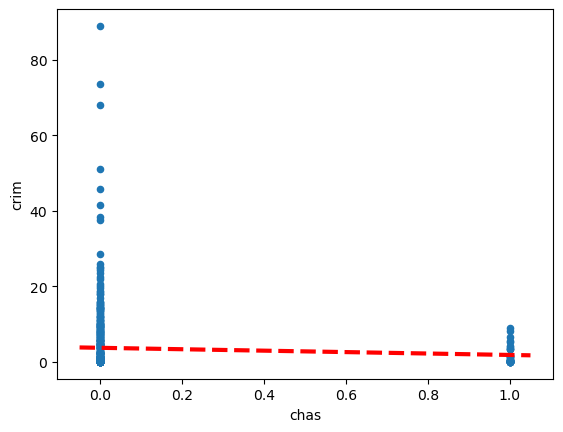

In [467]:
X3 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'chas': boston['chas']})
y3 = boston['crim']
model = sm.OLS(y3, X3) 
results = model.fit()
ax = boston.plot.scatter('chas', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [468]:
model = sm.OLS(y3, X3) 
results3 = model.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


There is not a statistically significant relationship between chas and crime due to a higher p-value of > 0.05. 

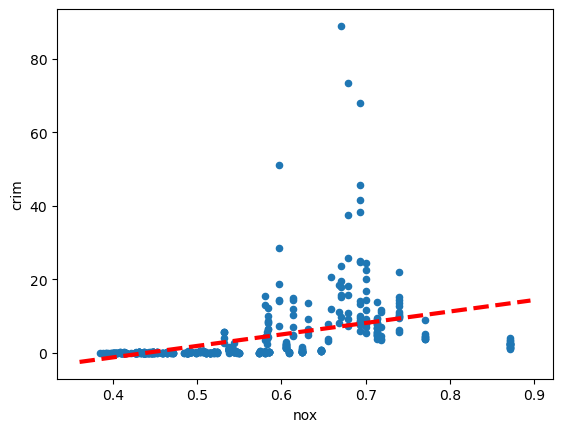

In [469]:
X4 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'nox': boston['nox']})
y4 = boston['crim']
model = sm.OLS(y4, X4) 
results = model.fit()
ax = boston.plot.scatter('nox', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [470]:
model = sm.OLS(y4, X4) 
results4 = model.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


There is a statistically significant relationship between nox and crime due to the low p-value of < 0.05. 

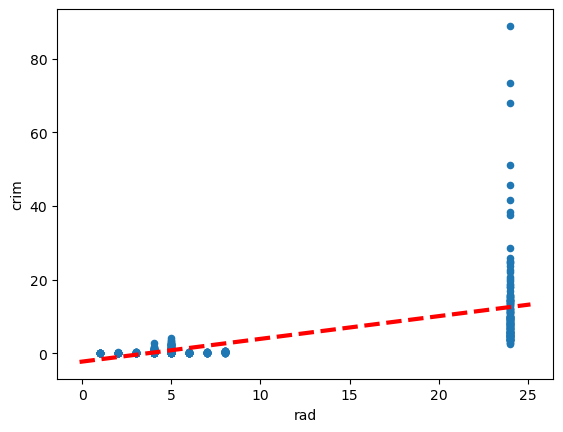

In [471]:
X8 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'rad': boston['rad']})
y8 = boston['crim']
model = sm.OLS(y8, X8) 
results = model.fit()
ax = boston.plot.scatter('rad', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [472]:
model = sm.OLS(y8, X8) 
results8 = model.fit()
summarize(results8)

,coef,std err,t,P>|t|
intercept,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


There is a statistically significant relationship between rad and crime due to the low p-value of < 0.05. 

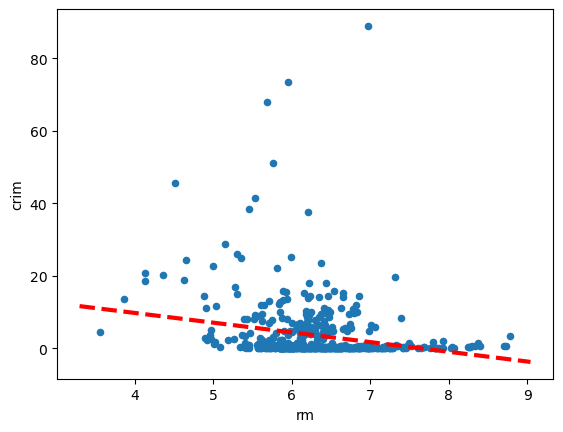

In [473]:
X5 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'rm': boston['rm']})
y5 = boston['crim']
model = sm.OLS(y5, X5) 
results = model.fit()
ax = boston.plot.scatter('rm', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [474]:
model = sm.OLS(y5, X5) 
results5 = model.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


There is a statistically significant relationship between rm and crime due to the low p-value of < 0.05. 

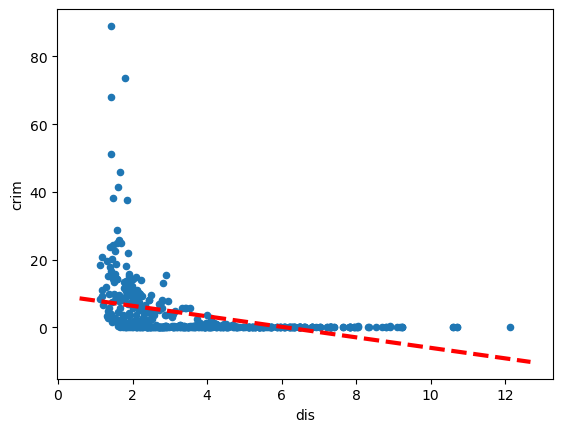

In [475]:
X7 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'dis': boston['dis']})
y7 = boston['crim']
model = sm.OLS(y7, X7) 
results = model.fit()
ax = boston.plot.scatter('dis', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [476]:
model = sm.OLS(y7, X7) 
results7 = model.fit()
summarize(results7)

,coef,std err,t,P>|t|
intercept,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


There is a statistically significant relationship between dis and crime due to the low p-value of < 0.05. 

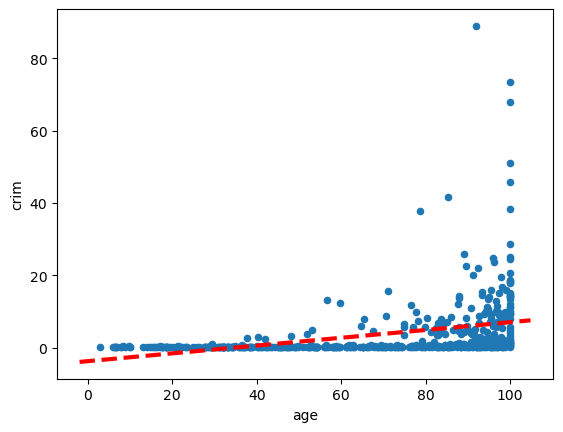

In [477]:
X6 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'age': boston['age']})
y6 = boston['crim']
model = sm.OLS(y6, X6) 
results = model.fit()
ax = boston.plot.scatter('age', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [478]:
model = sm.OLS(y6, X6) 
results6 = model.fit()
summarize(results6)

,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


There is a statistically significant relationship between age and crime due to the low p-value of < 0.05. 

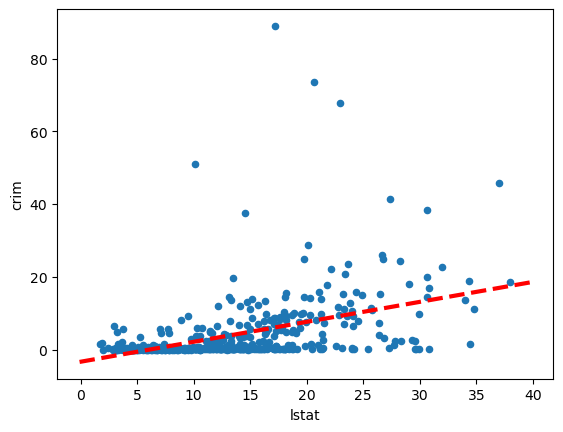

In [479]:
X11 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'lstat': boston['lstat']})
y11 = boston['crim']
model = sm.OLS(y11, X11) 
results = model.fit()
ax = boston.plot.scatter('lstat', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [480]:
model = sm.OLS(y11, X11) 
results11 = model.fit()
summarize(results11)

,coef,std err,t,P>|t|
intercept,-3.3305,0.694,-4.801,0.0
lstat,0.5488,0.048,11.491,0.0


There is a statistically significant relationship between lstat and crime due to the low p-value of < 0.05. 

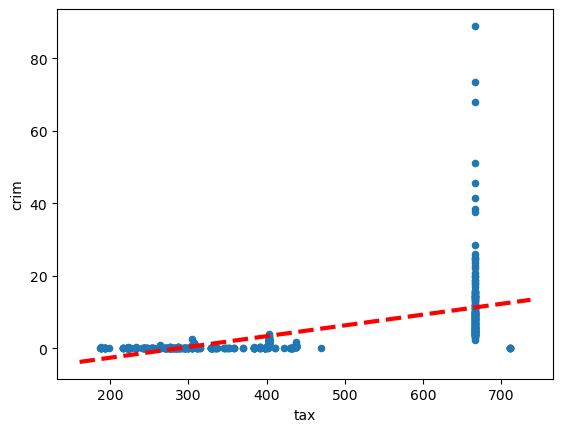

In [481]:
X9 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'tax': boston['tax']})
y9 = boston['crim']
model = sm.OLS(y9, X9) 
results = model.fit()
ax = boston.plot.scatter('tax', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [482]:
model = sm.OLS(y9, X9) 
results9 = model.fit()
summarize(results9)

,coef,std err,t,P>|t|
intercept,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


There is a statistically significant relationship between tax and crime due to the low p-value of < 0.05. 

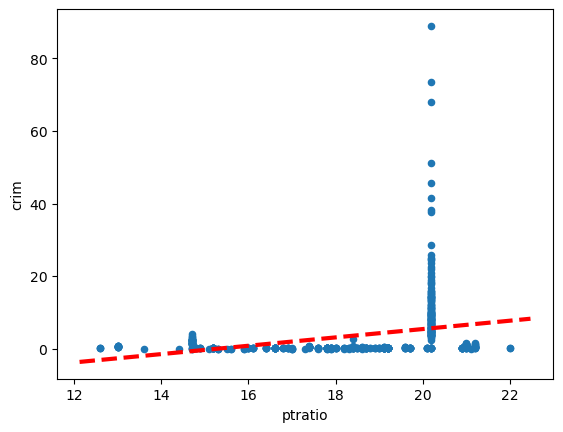

In [483]:
X10 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'ptratio': boston['ptratio']})
y10 = boston['crim']
model = sm.OLS(y10, X10) 
results = model.fit()
ax = boston.plot.scatter('ptratio', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [484]:
model = sm.OLS(y10, X10) 
results10 = model.fit()
summarize(results10)

,coef,std err,t,P>|t|
intercept,-17.6469,3.147,-5.607,0.0
ptratio,1.1520,0.169,6.801,0.0


There is a statistically significant relationship between ptratio and crime due to the low p-value of < 0.05. 

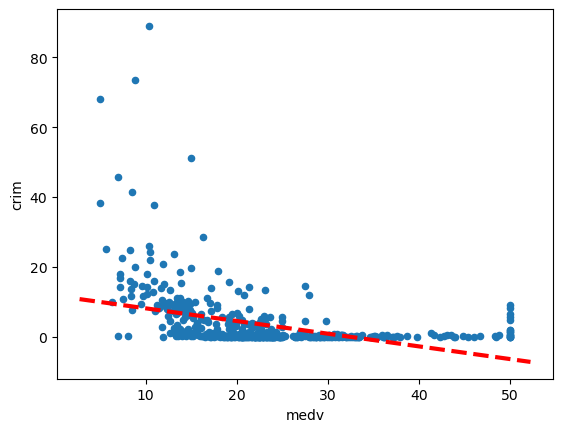

In [515]:
X12 = pd.DataFrame({'intercept': np.ones(boston.shape[0]), 
                  'medv': boston['medv']})
y12 = boston['crim']
model = sm.OLS(y12, X12) 
results = model.fit()
ax = boston.plot.scatter('medv', 'crim') 
abline(ax,
       results.params[0],
       results.params[1], 
       'r--', 
       linewidth=3)

In [486]:
model = sm.OLS(y12, X12) 
results12 = model.fit()
summarize(results12)

,coef,std err,t,P>|t|
intercept,11.7965,0.934,12.628,0.0
medv,-0.3632,0.038,-9.460,0.0


There is a statistically significant relationship between medv and crime due to the low p-value of < 0.05. 

#### b).
Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [487]:
X = MS(terms).fit_transform(boston)
y = boston['crim']
model = sm.OLS(y, X)
resultsMul = model.fit() 
resultsMul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.03e-56
Time:                        12:23:58   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<strong>Conclusion:</strong> Judging by the low p-values for zn, dis, rad, and medv, these are the only predictors for which we can reject the null hypothesis. It also looks like this is a poor model in general, with a very low r-squared value of less than 0.5 (50%). The high F-statistic reveals that there is at least one predictor that has a strong relationship with the dependent (response) variable, which we know to be true. However, the low R-squared value indicates that the model overall does a poor job at explaining the variation in the dependant variable.

Realistically, if we were using this model in real life, we would want to remove the predictors that have high p-values, which are contributing to the lower R-squared value.

#### c).
How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [488]:
resultsMul.params

intercept    13.778394
zn            0.045710
indus        -0.058350
chas         -0.825378
nox          -9.957587
rm            0.628911
age          -0.000848
dis          -1.012247
rad           0.612465
tax          -0.003776
ptratio      -0.304073
lstat         0.138801
medv         -0.220056
dtype: float64

In [527]:
X = [results1.params[0],
     results2.params[0],
     results3.params[0],
     results4.params[0],
     results5.params[0],
     results6.params[0],
     results7.params[0],
     results8.params[0],
     results9.params[0],
     results10.params[0],
     results11.params[0],
     results12.params[0]]
Y = resultsMul.params[1:]

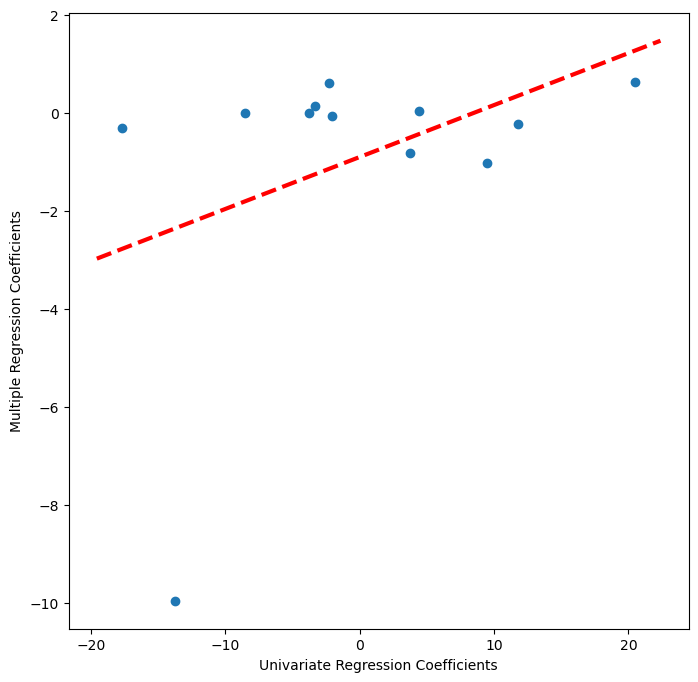

In [532]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X, Y, marker='o');
ax.set_xlabel("Univariate Regression Coefficients") 
ax.set_ylabel("Multiple Regression Coefficients")
abline(ax,
       -0.90085,
       0.10606,
       'r--', 
       linewidth=3);

#### d).
Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =β0 +β1X+β2X2 +β3X3 +ε.

In [543]:
X = MS([poly('zn', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('indus', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('chas', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('nox', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('rm', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('age', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('dis', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('rad', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('tax', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('ptratio', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('lstat', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

X = MS([poly('medv', degree=3)]).fit_transform(boston) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3), "\n\n")

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230 


                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000 


                           coef  std err      t  P>|t|
intercept                3.7414    0.396  9.454  0.000
poly(chas, degree=3)[0] -0.0569    0.012 -4.939  0.000
poly(chas, degree=3)[1] -0.0988    0.014 -6.891  0.000
poly(chas, degree=3)[2] -0.3508    0.282 -1.242  0.215 


                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11

<strong>Is there evidence of non-linear association between any of the predictors and the response?:</strong> There is some between medv, ptratio, dis, age, nox, and indus.